In [1]:
#Importing all the libraries needed in this project
import pandas as pd
import numpy as np
import os, fnmatch
import json
import glob
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

# Gather (DS1)

In [2]:
#Import the first data package we do have
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

# Assess (DS1)

In [4]:
df_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [5]:
df_archive.shape

(2356, 17)

In [6]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [7]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
df_archive.query('rating_numerator > 20' or df_archive.query('rating_numerator < 10' or 
                                                                   df_archive.query('rating_denominator != 10')))

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [9]:
lowercase_names= df_archive.name.str.contains('^[a-z]', regex=True)
df_archive[lowercase_names].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [10]:
df_archive['name'].value_counts()

None              745
a                  55
Charlie            12
Oliver             11
Lucy               11
Cooper             11
Penny              10
Lola               10
Tucker             10
Bo                  9
Winston             9
Sadie               8
the                 8
Daisy               7
an                  7
Buddy               7
Toby                7
Bailey              7
Rusty               6
Scout               6
Koda                6
Oscar               6
Bella               6
Jax                 6
Milo                6
Stanley             6
Leo                 6
Dave                6
Jack                6
George              5
                 ... 
Einstein            1
his                 1
Harrison            1
Teddy               1
Cermet              1
Zuzu                1
Crimson             1
Strudel             1
Kulet               1
Chase               1
Spencer             1
Chesney             1
Sweets              1
Divine              1
Jo        

# Gather (DS2)

In [11]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)
file_name = 'tweet_json.txt'
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
if not os.path.isfile(file_name):
    with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
      for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

0.00025107900000875816
{}


In [12]:
df_list = []
with open ('tweet_json.txt', 'r') as file:
    for line in file:
        response = json.loads(line)
        tweet_id = response["id"]
        retweet_count = response["retweet_count"]
        favorite_count = response["favorite_count"]
        df_list.append({"tweet_id":tweet_id, "retweet_count": retweet_count,
                        "favorite_count":favorite_count})
        
df_api= pd.DataFrame(df_list, columns = ["tweet_id", "retweet_count", "favorite_count"])

# Assess (DS2)

In [13]:
df_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [14]:
df_api.shape

(2354, 3)

In [15]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [16]:
df_api['favorite_count'].isnull().sum()

0

In [17]:
df_api.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [18]:
df_api['tweet_id'].isnull().sum()

0

# Gather (DS3)

In [19]:
#Import Image predictions Data "third data package we do have"
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = url.split('/')[-1]
response = requests.get(url)
if not os.path.isfile(file_name):
    with open (os.path.join(url.split('/')[-1]), mode='wb') as file:
        file.write(response.content)

In [20]:
fnmatch.filter(os.listdir('.'), '*.tsv')

['image-predictions.tsv']

In [21]:
df_prediction = pd.read_csv('image-predictions.tsv', '\t')

# Asesss (DS3)

In [22]:
df_prediction.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [23]:
df_prediction.shape

(2075, 12)

In [24]:
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
df_prediction.describe().style.format('{0:,.5f}')

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,"2,075.00000","2,075.00000","2,075.00000","2,075.00000","2,075.00000"
mean,"738,451,357,852,529,152.00000",1.20386,0.59455,0.13459,0.06032
std,"67,852,033,330,235,664.00000",0.56188,0.27117,0.10067,0.05091
min,"666,020,888,022,790,144.00000",1.00000,0.04433,0.00000,0.00000
25%,"676,483,507,139,540,992.00000",1.00000,0.36441,0.05389,0.01622
50%,"711,998,809,858,043,904.00000",1.00000,0.58823,0.11818,0.04944
75%,"793,203,448,525,178,880.00000",1.00000,0.84386,0.19557,0.09181
max,"892,420,643,555,336,192.00000",4.00000,1.00000,0.48801,0.27342


In [26]:
df_prediction['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
web_site                      19
Cardigan                      19
Maltese_dog                   18
beagle                        18
Eskimo_dog                    18
Shetland_sheepdog             18
teddy                         18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

In [27]:
df_prediction['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Eskimo_dog                         27
Pembroke                           27
collie                             27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
miniature_pinscher                 20
toy_terrier                        20
Samoyed                            20
malinois                           20
chow                               20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [28]:
df_prediction['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
cocker_spaniel                    31
beagle                            31
toy_poodle                        29
Pomeranian                        29
Pekinese                          29
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
Pembroke                          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
L

In [29]:
(df_prediction['tweet_id'].value_counts()).unique()

array([1])

In [30]:
all_columns = pd.Series(list(df_archive) + list(df_prediction))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

#### Quality
##### `Archive` table
- Unwanted retweets.
- Unwanted replies.
- Erroneous datatypes (timestamp and tweet id columns)
- Inaccurate records of rating numerator.
- Invalid records of rating numerator and denminator.
- Unwanted empty expanded url cell.
- Nulls represented as (None) in dog stage columns.
- "None" entries in name column.
- Invalid names in name column.

##### `API` table
- Erroneous datatypes (tweet_id)

##### `Prediction` table
- Erroneous datatypes (image num and tweet_id)
- Lowercase dog_breed with no ("_").

#### Tidiness
- Unwanted Columns of replies "Archive table"
- Unwanted Columns of retweets "Archive table"
- Four dog stages columns to be merged in one "Archive table"
- Cleaned archive and api tables to be merged "API tabe".
- Wide format of nine columns predictions-related to be long of onlu three columns "prediction table".
- Max prediction value per each tweet in a new dataframe to be merged with archive dataset "prediction table".
- Rating denominator not needed and name of numerator rating "Archive table".
- Columns to be ordered where the numerical ones to be in the front "Archive table".

# Clean

In [31]:
archive_clean = df_archive.copy()
api_clean = df_api.copy()
prediction_clean = df_prediction.copy()

## `Archive Table` 


### Q1:

##### Define
Drop all of the rows of retweets that don't match the criteria which is (only original tweets)

##### Code

In [32]:
#Filter oringinal tweets only with no retweets
archive_clean = archive_clean[~(archive_clean.retweeted_status_id.notnull())]

##### Test

In [33]:
#Data decreased to 2175 rows where 181 rows of tweets had been dropped
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

###  Q2:

##### Define
Drop all of the rows of replies that don't match the criteria which is (only original tweets)

##### Code

In [34]:
#Filter oringinal tweets only with no retweets
archive_clean = archive_clean[~(archive_clean.in_reply_to_status_id.notnull())]

##### Test

In [35]:
#Data decreased to 2097 rows where 78 rows of tweets had been dropped
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

### Tidiness 1&2: 


##### Define
Drop all empty columns related to retweets.

##### Code

In [36]:
#Filter oringinal tweets only with no retweets
archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'],axis=1, inplace=True)

##### Test

In [37]:
list(archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

##### Define
Drop all empty columns related to replies.

##### Code

In [38]:
#Filter oringinal tweets only with no retweets
archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'],axis=1, inplace=True)

##### Test

In [39]:
list(archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Q3:

##### Define
Erroneous datatypes (timestamp and tweet id ) Convert timestamp to datetime and tweet id to a string

##### Code

In [40]:
#Convert timestamp column to date time
archive_clean ['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#Convert tweet id column to date time
archive_clean ['tweet_id'] = archive_clean['tweet_id'].astype(str)

##### Test

In [41]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 213.0+ KB


### Q4: 


##### Define
Fix the inaccurate records of rating numerator besides the innvalid records of rating numerator and denminator.

##### Code

In [42]:
#Manual fix for these indexes where their rating are already existing
archive_clean.at[1662, 'rating_numerator'] = 10
archive_clean.at[1202, 'rating_numerator'] = 11
archive_clean.at[1165, 'rating_numerator'] = 13
archive_clean.at[1068, 'rating_numerator'] = 14
archive_clean.at[695, 'rating_numerator'] = 9.75
archive_clean.at[763, 'rating_numerator'] = 11.27
archive_clean.at[2335, 'rating_numerator'] = 9

archive_clean.at[1662, 'rating_denominator'] = 10
archive_clean.at[1202, 'rating_denominator'] = 10
archive_clean.at[1165, 'rating_denominator'] = 10
archive_clean.at[1068, 'rating_denominator'] = 10
archive_clean.at[695, 'rating_denominator'] = 10
archive_clean.at[763, 'rating_denominator'] = 10
archive_clean.at[2335, 'rating_denominator'] = 10

In [43]:
#Drop the rest which have no ratings in the text besides having ratings far from the unique rating system
archive_clean =archive_clean[archive_clean['rating_denominator'] == 10]

#Drop the numerators which are greater than 20 as they don't make any sense
archive_clean =archive_clean[archive_clean['rating_numerator'] < 20]

##### Test

In [44]:
archive_clean.query('rating_numerator > 20' or archive_clean.query('rating_numerator < 10' or 
                                                                   archive_clean.query('rating_denominator != 10')))

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Q5:

##### Define
Drop the empty expanded urls cells.

##### Code

In [45]:
archive_clean = archive_clean[~(archive_clean.expanded_urls.isnull())]

##### Test

In [46]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2079 non-null object
timestamp             2079 non-null datetime64[ns]
source                2079 non-null object
text                  2079 non-null object
expanded_urls         2079 non-null object
rating_numerator      2079 non-null int64
rating_denominator    2079 non-null int64
name                  2079 non-null object
doggo                 2079 non-null object
floofer               2079 non-null object
pupper                2079 non-null object
puppo                 2079 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 211.1+ KB


### Q6 & Tidiness 3:


####  Replace the "None" value with null and melt all of the four columns of dog stages into one column

##### Define
Replace all the None with np.nan values, then merge all of the four columns (melt concept)

##### Code

In [47]:
#Replace all of the None entries in the mentioned four columns with nothing:
dog_stage_list = ['doggo', 'floofer', 'pupper', 'puppo']

for c in dog_stage_list:
    archive_clean[c] = archive_clean[c].apply(lambda x: x.replace("None", ""))

In [48]:
#Augment the four column together for creating one columns (melt method concept)
archive_clean['dog_stage'] = archive_clean['doggo'] + archive_clean['floofer'] +archive_clean['pupper'] + archive_clean['puppo']
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace= True)

In [49]:
#Replace and clean the entries to be easily read
archive_clean['dog_stage'] = archive_clean['dog_stage'].replace(to_replace=["", "doggopuppo", "doggofloofer","doggopupper"],
                                                          value=[np.nan,"doggo-puppo", "doggo-floofer","doggo-pupper"])

##### Test

In [50]:
archive_clean.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1586,686760001961103360,2016-01-12 04:01:58,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pupper forgot how to walk. 12/10 happens ...,https://vine.co/v/iMvubwT260D,12,10,None,pupper
757,778624900596654080,2016-09-21 16:00:17,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's a sailor pup. 11/10 would...,https://twitter.com/dog_rates/status/778624900...,11,10,Penny,NaN
1572,687664829264453632,2016-01-14 15:57:26,"<a href=""http://twitter.com/download/iphone"" r...",Meet Opal. He's a Belgian Dijon Poofster. Upse...,https://twitter.com/dog_rates/status/687664829...,11,10,Opal,NaN
1515,690989312272396288,2016-01-23 20:07:44,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",We've got a doggy down. Requesting backup. 12/...,https://vine.co/v/iOZKZEU2nHq,12,10,None,NaN
1968,673320132811366400,2015-12-06 01:56:44,"<a href=""http://twitter.com/download/iphone"" r...",This is Frankie. He's wearing blush. 11/10 rea...,https://twitter.com/dog_rates/status/673320132...,11,10,Frankie,NaN
347,831911600680497154,2017-02-15 17:02:36,"<a href=""http://twitter.com/download/iphone"" r...",Meet Kuyu. He was trapped in a well for 10 day...,https://twitter.com/dog_rates/status/831911600...,14,10,Kuyu,NaN
131,867051520902168576,2017-05-23 16:16:06,"<a href=""http://twitter.com/download/iphone"" r...","Oh my this spooked me up. We only rate dogs, n...",https://twitter.com/dog_rates/status/867051520...,13,10,None,NaN
368,828708714936930305,2017-02-06 20:55:28,"<a href=""http://twitter.com/download/iphone"" r...",This is Fiona. She's an exotic dog. Seems rath...,https://twitter.com/dog_rates/status/828708714...,10,10,Fiona,NaN
2301,667044094246576128,2015-11-18 18:17:59,"<a href=""http://twitter.com/download/iphone"" r...",12/10 gimme now https://t.co/QZAnwgnOMB,https://twitter.com/dog_rates/status/667044094...,12,10,None,NaN
2048,671511350426865664,2015-12-01 02:09:16,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Hammond. He's just a wee lil pup....,https://twitter.com/dog_rates/status/671511350...,8,10,Hammond,NaN


### Q7:


##### Define
Replace all the invalid names and the "None" entries with null values.

##### Code

In [51]:
#Names seem to start with capital letter, so such small letter entries aren't names
invalid_names= archive_clean.name.str.contains('^[a-z]', regex=True)
archive_clean[invalid_names].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'unacceptable',
       'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life',
       'light', 'space'], dtype=object)

In [52]:
archive_clean.loc[invalid_names, 'name'] = np.nan
archive_clean['name'] = archive_clean['name'].replace(to_replace=["None"],
                                                          value=[np.nan])

#### Test

In [53]:
archive_clean['name'].value_counts()

Lucy            11
Charlie         11
Cooper          10
Oliver          10
Tucker           9
Penny            9
Lola             8
Sadie            8
Winston          8
Toby             7
Daisy            7
Stanley          6
Oscar            6
Koda             6
Bella            6
Bo               6
Jax              6
Bailey           6
Milo             5
Chester          5
Dave             5
Bentley          5
Leo              5
Scout            5
Louis            5
Buddy            5
Rusty            5
Duke             4
Sammy            4
Alfie            4
                ..
Tebow            1
Ivar             1
Vinscent         1
Mo               1
Ralphson         1
Cleopatricia     1
Tassy            1
Juckson          1
Canela           1
Bodie            1
Grizzwald        1
Gunner           1
Bloop            1
Tyrone           1
Kara             1
Rascal           1
Mairi            1
Ralphie          1
Chase            1
Spencer          1
Chesney          1
Bode        

## `API Table` 


### Q1:

##### Define
Erroneous datatypes (timestamp and tweet id ) Convert tweet id to a string

##### Code

In [54]:
#Convert tweet id column to date time
api_clean['tweet_id'] = api_clean['tweet_id'].astype(str)

##### Test

In [55]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### Tidiness 1:


##### Define
Merge  Archive_clean and API_clean tables into one dataset where all of the data complement each other.

##### Code

In [56]:
archive_clean = pd.merge(archive_clean, api_clean, on= "tweet_id", how= 'left')

##### Test

In [57]:
archive_clean.sample(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
964,718454725339934721,2016-04-08 15:05:29,"<a href=""http://twitter.com/download/iphone"" r...",This pic is old but I hadn't seen it until tod...,https://twitter.com/dog_rates/status/718454725...,13,10,NaN,NaN,1685,5320


## `Prediction Table` 


### Tidiness1: 

#### Reshaping image prediction dataset from wide to long (less columns)

##### Define
Merge the nine columns into three columns by gathering the p columns together and similarly for p_conf and p_dog columns

##### Code

In [58]:
p_list = ["p1", "p2", "p3" ]
p_conf_list = ["p1_conf", "p2_conf", "p3_conf"]
p_dog_list = ["p1_dog", "p2_dog", "p3_dog"]

prediction_clean = prediction_clean.melt(id_vars=["tweet_id","jpg_url", "img_num", "p1_conf", "p1_dog", "p2_conf", "p2_dog",
                                        "p3_conf", "p3_dog"], 
                                 value_vars= p_list, var_name = "prediction", value_name="dog_breed")

prediction_clean = prediction_clean.melt(id_vars=["tweet_id","jpg_url", "img_num", "prediction", "dog_breed", "p1_dog", "p2_dog"
                                        , "p3_dog"], 
                                 value_vars= p_conf_list, var_name = "Var2" ,value_name="prediction_confidence")

prediction_clean = prediction_clean.melt(id_vars=["tweet_id","jpg_url", "img_num", "prediction", "dog_breed", "Var2","prediction_confidence" ], 
                                 value_vars= p_dog_list, var_name = "Var3" ,value_name="validity")

#Removing all of unneeded rows and columns
prediction_clean = prediction_clean[(prediction_clean['prediction']== prediction_clean['Var2'].str[:2]) & (prediction_clean['Var2'].str[:2] == prediction_clean['Var3'].str[:2])
              & (prediction_clean['prediction']== prediction_clean['Var3'].str[:2])]

prediction_clean.drop(['Var2', 'Var3'], axis =1, inplace=True)

#Resetting index to the normal way
prediction_clean = prediction_clean.reset_index(drop=True)

#### Test

In [59]:
prediction_clean.head(2)

,tweet_id,jpg_url,img_num,prediction,dog_breed,prediction_confidence,validity
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,p1,redbone,0.506826,True


### Q1:

##### Define
Erroneous datatypes (image_num and tweet id ) Convert tweet id to a string and image num to category

#### Code

In [60]:
#Converting image_num colum to category dtype besides tweet_id to string
prediction_clean['img_num'] = prediction_clean['img_num'].astype('category')

#Converting tweet_id to string
prediction_clean['tweet_id'] = prediction_clean['tweet_id'].astype('str')

#### Test

In [61]:
prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 7 columns):
tweet_id                 6225 non-null object
jpg_url                  6225 non-null object
img_num                  6225 non-null category
prediction               6225 non-null object
dog_breed                6225 non-null object
prediction_confidence    6225 non-null float64
validity                 6225 non-null bool
dtypes: bool(1), category(1), float64(1), object(4)
memory usage: 255.6+ KB


### Q2:

##### Define
Decapitalize all of the names and replace "_" with whitespace (dog breed column to be edited regarding their way of display)

#### Code

In [62]:
#Unifying the p columns to be of the same consistency
prediction_clean['dog_breed'] = prediction_clean['dog_breed'].apply(lambda x: x.replace("_", " ").lower())

#### Test

In [63]:
prediction_clean['dog_breed'].head(5)

0    welsh springer spaniel
1                   redbone
2           german shepherd
3       rhodesian ridgeback
4        miniature pinscher
Name: dog_breed, dtype: object

### Tidiness2:


##### Define
Group by the max confidence level per each tweet and put into a dataframe in order to get its corresponding breed and merge it with the archive clean table

#### Code

In [64]:
bestofbest= prediction_clean.groupby(['tweet_id'])['prediction_confidence'].max()

df_bestofbest = pd.DataFrame(bestofbest, columns = ["dog_breed", "prediction_confidence"])

df_bestofbest = pd.merge(df_bestofbest, prediction_clean, on = ['tweet_id', 'prediction_confidence'],
                            how = 'inner')

df_bestofbest.drop(["dog_breed_x", "jpg_url", "img_num","prediction", "validity"], axis= 1, inplace=True)

df_bestofbest = df_bestofbest.rename(columns={"dog_breed_y":"dog_breed"})

In [65]:
df_bestofbest.head()

,tweet_id,prediction_confidence,dog_breed
0,666020888022790149,0.465074,welsh springer spaniel
1,666029285002620928,0.506826,redbone
2,666033412701032449,0.596461,german shepherd
3,666044226329800704,0.408143,rhodesian ridgeback
4,666049248165822465,0.560311,miniature pinscher


In [66]:
archive_clean = pd.merge(archive_clean, df_bestofbest, on= "tweet_id", how= 'inner')

##### Test

In [67]:
archive_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,prediction_confidence,dog_breed
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,39467,0.097049,orange


## `ِArchive Table "Final Version" ` 


### Tidiness4: 

##### Define
Drop the rating_denominator	and rename the column rating_numerator to rating:


##### Code

In [68]:
#As it is all of 10 and not needed for the analysis
archive_clean['rating_denominator'].unique()

array([10])

In [69]:
archive_clean.drop(['rating_denominator'], axis=1, inplace=True)
archive_clean.rename(columns= {"rating_numerator":"rating"}, inplace=True)

#### Test

In [70]:
list(archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating',
 'name',
 'dog_stage',
 'retweet_count',
 'favorite_count',
 'prediction_confidence',
 'dog_breed']

### Tidiness5: 

##### Define
Rorder the columns where the numrical ones to be alongside each other and in the front


##### Code

In [71]:
col_list = list(archive_clean.columns)

In [72]:
col_list = ['tweet_id', 'timestamp', 'rating', 'retweet_count', 'favorite_count',
            'dog_breed', 'prediction_confidence', 'name', 'dog_stage', 'source', 'text']

archive_clean = archive_clean[col_list]

#### Test

In [73]:
archive_clean.head(1)

,tweet_id,timestamp,rating,retweet_count,favorite_count,dog_breed,prediction_confidence,name,dog_stage,source,text
0,892420643555336193,2017-08-01 16:23:56,13,8853,39467,orange,0.097049,Phineas,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...


# Store

Store the final dataset after cleaning the three datasets and merge the  extracted columns of interest into one dataset which is "Archive_clean"

#### Code

In [75]:
archive_clean.to_csv('twitter_archive_master.csv', index=False)

#### Test

In [76]:
fnmatch.filter(os.listdir('.'), '*.csv')

['twitter-archive-enhanced.csv', 'twitter_archive_master.csv']

# Analyze

In [77]:
#Import the cleaned data to for analysis and visualisation:
archive_analyze = pd.read_csv('twitter_archive_master.csv',dtype={"tweet_id":"str"})
archive_analyze ['timestamp'] = pd.to_datetime(archive_analyze['timestamp'])

In [78]:
#Summary Statistics for all the numerical data:
archive_analyze[['rating', 'retweet_count', 'favorite_count', 'prediction_confidence']].describe().style.format('{0:,.2f}')

,rating,retweet_count,favorite_count,prediction_confidence
count,"1,956.00","1,956.00","1,956.00","1,956.00"
mean,10.54,"2,792.57","8,981.93",0.59
std,2.17,"4,713.76","12,306.54",0.27
min,0.00,16.00,81.00,0.04
25%,10.00,623.75,"1,967.50",0.36
50%,11.00,"1,366.50","4,148.00",0.59
75%,12.00,"3,245.25","11,455.75",0.85
max,14.00,"79,515.00","132,810.00",1.00


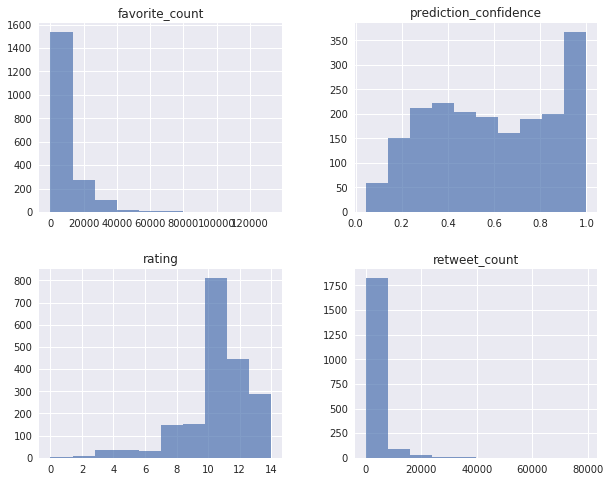

In [79]:
#A glimpse how the data distribution seem:
archive_analyze.hist(figsize = (10,8), alpha=0.7);

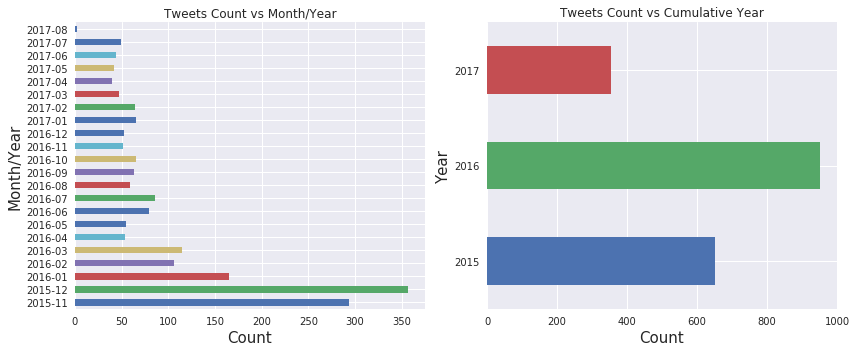

In [80]:
#Interactions with WeRateDogs through tweets over months of specified years in the dataset and across the years cumulatively
z= archive_analyze['timestamp'].dt.year
h= archive_analyze['timestamp'].dt.to_period('M')

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
archive_analyze.groupby(h)['tweet_id'].count().plot(kind='barh', ax=ax1, title='Tweets Count vs Month/Year')
ax1.set_xlabel('Count', size=15)
ax1.set_ylabel('Month/Year', size=15)

archive_analyze.groupby(z)['tweet_id'].count().plot(kind='barh', ax=ax2, title='Tweets Count vs Cumulative Year')
ax2.set_xlabel('Count', size=15)
ax2.set_ylabel('Year', size=15)

plt.tight_layout()

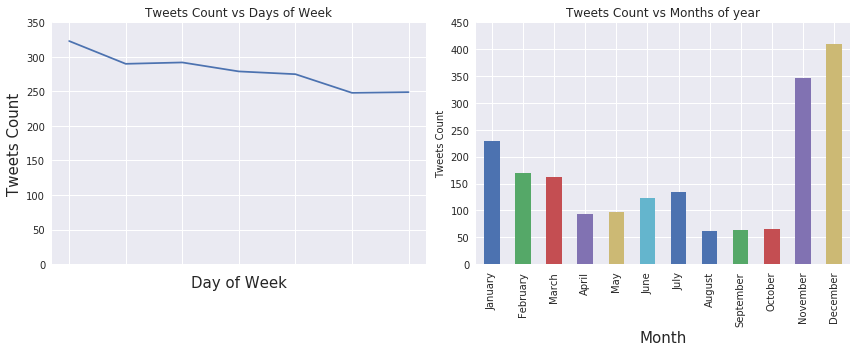

In [81]:
#Interactions with WeRateDogs through tweets over the days of week and months across the dataset period of time

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

x= archive_analyze['timestamp'].dt.day_name()
y= archive_analyze['timestamp'].dt.month_name()

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
archive_analyze.groupby(x)['tweet_id'].count().reindex(weekdays).plot(kind='line',ylim=(0,350), ax=ax1, title='Tweets Count vs Days of Week')
ax1.set_xlabel('Day of Week', size=15)
ax1.set_ylabel('Tweets Count', size=15)


archive_analyze.groupby(y)['tweet_id'].count().reindex(months).plot(kind='bar',ylim=(0,450), ax=ax2, title='Tweets Count vs Months of year')
ax2.set_xlabel('Month', size=15)
ax2.set_ylabel('Tweets Count', size=10)

ax1.tick_params(axis ='x', rotation = 90)
ax2.tick_params(axis ='x', rotation = 90, which='both')
plt.tight_layout()

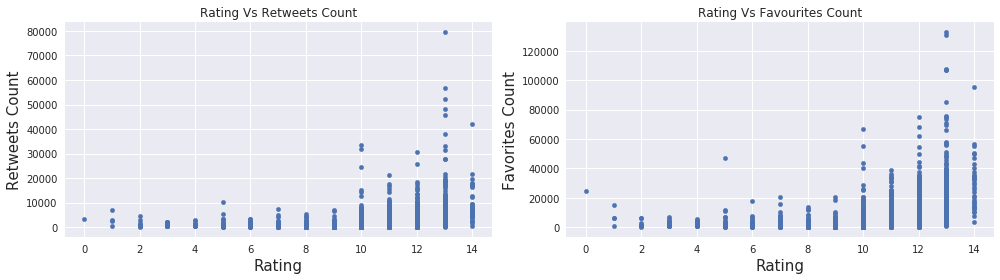

In [82]:
#Rating Vs. Retweet count and favourite count

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,4))
archive_analyze.plot(x='rating',y='retweet_count', kind='scatter', ax=ax1, title= 'Rating Vs Retweets Count')
ax1.set_xlabel('Rating', size=15)
ax1.set_ylabel('Retweets Count', size=15)

archive_analyze.plot(x='rating',y='favorite_count', kind='scatter', ax=ax2, title="Rating Vs Favourites Count")
ax2.set_xlabel('Rating', size=15)
ax2.set_ylabel('Favorites Count', size=15)

plt.tight_layout()

In [83]:
#Summary Statistics of Dog Stages
archive_analyze.groupby('dog_stage')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,63.0,11.888889,1.471351,8.0,11.00,12.0,13.0,14.0
doggo-floofer,1.0,11.000000,NaN,11.0,11.00,11.0,11.0,11.0
doggo-pupper,8.0,11.000000,2.563480,5.0,11.50,12.0,12.0,13.0
doggo-puppo,1.0,13.000000,NaN,13.0,13.00,13.0,13.0,13.0
floofer,7.0,12.000000,1.154701,10.0,11.50,12.0,13.0,13.0
pupper,201.0,10.636816,1.735638,3.0,10.00,11.0,12.0,14.0
puppo,22.0,12.000000,1.309307,9.0,11.25,12.0,13.0,14.0


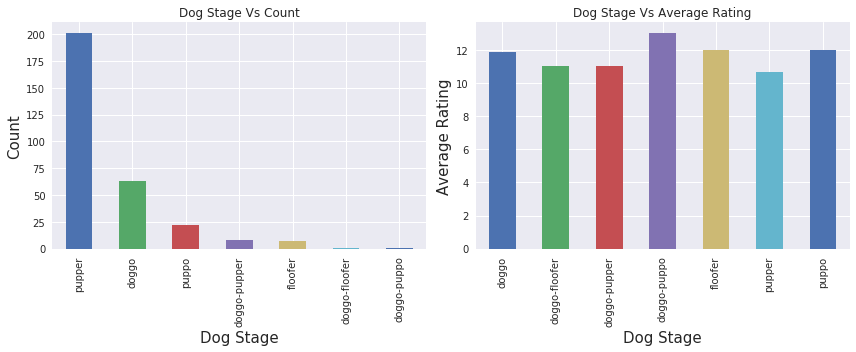

In [84]:
#Dog Stages Count available in the dataset besides the average rating per each stage
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5)) 

archive_analyze['dog_stage'].value_counts().plot(kind='bar', ax=ax1, title="Dog Stage Vs Count")
ax1.set_xlabel('Dog Stage', size=15)
ax1.set_ylabel('Count', size=15)

archive_analyze.groupby('dog_stage')['rating'].mean().plot(kind='bar', title="Dog Stage Vs Average Rating")
ax2.set_xlabel('Dog Stage', size=15)
ax2.set_ylabel('Average Rating', size=15)

plt.tight_layout()

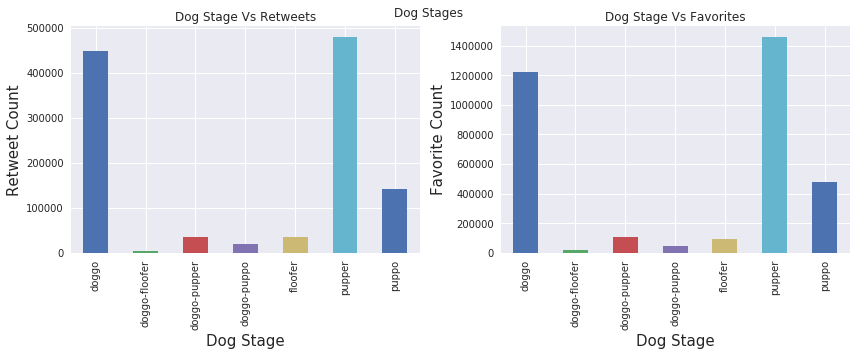

In [85]:
#Total Retweets and Favorites per each dog stage
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5)) 

archive_analyze.groupby('dog_stage')['retweet_count'].sum().plot(kind='bar', ax=ax1, title='Dog Stage Vs Retweets')
ax1.set_xlabel('Dog Stage', size=15)
ax1.set_ylabel('Retweet Count', size=15)

archive_analyze.groupby('dog_stage')['favorite_count'].sum().plot(kind='bar', ax=ax2, title='Dog Stage Vs Favorites')
ax2.set_xlabel('Dog Stage', size=15)
ax2.set_ylabel('Favorite Count', size=15)

plt.suptitle('Dog Stages')
plt.tight_layout()

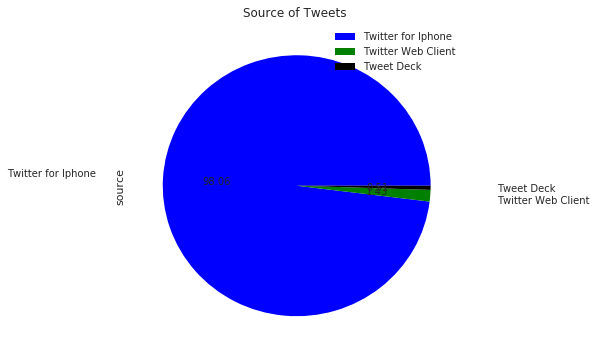

In [91]:
#How the tweets were posted
archive_analyze['source'].value_counts().plot.pie(labels=['Twitter for Iphone', 'Twitter Web Client', 'Tweet Deck' ], 
                                   colors=['blue', 'g', 'black'], autopct='%.2f', fontsize=10, figsize=(6, 6), legend=True,
                                                 title="Source of Tweets ",labeldistance=1.5);

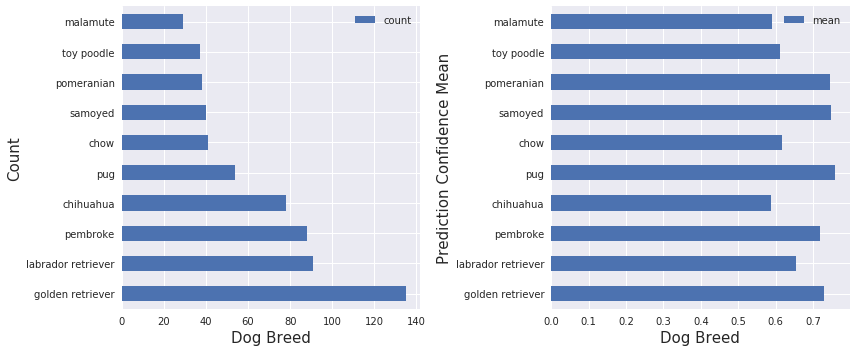

In [92]:
#Top 10 predicted dog breeds and their corresponding prediction confidence mean
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5)) 

archive_analyze.groupby('dog_breed')['prediction_confidence'].describe().sort_values(ascending=False, by= 'count').iloc[:10,:1].plot(kind='barh', ax=ax1)
ax1.set_xlabel('Dog Breed', size=15)
ax1.set_ylabel('Count', size=15)

archive_analyze.groupby('dog_breed')['prediction_confidence'].describe().sort_values(ascending=False, by= 'count').iloc[:10,[1]].plot(kind='barh', ax=ax2)
ax2.set_xlabel('Dog Breed', size=15)
ax2.set_ylabel('Prediction Confidence Mean', size=15)

plt.tight_layout()

In [93]:
#Top 10 prediction confidence mean of dog breeds and their corressponding count
archive_analyze.groupby('dog_breed')['prediction_confidence'].describe().sort_values(ascending=False, by='mean').iloc[:10, :2]

,count,mean
dog_breed,,
ping-pong ball,1.0,0.999945
peacock,1.0,0.999924
school bus,1.0,0.999833
bib,1.0,0.998814
slug,1.0,0.998075
zebra,1.0,0.997673
fountain,1.0,0.997509
china cabinet,1.0,0.996031
flamingo,1.0,0.992710
